# Context
This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

Content:

Time Period: 2001 - 2012

Granularity: Yearly

Location: States and U.T's of India

Parameters:

a) Suicide causes

b) Education status

c) By means adopted

d) Professional profile

e) Social status

In [1]:
#importing necessary library for work
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Suicides in India 2001-2012.csv')
df.head()


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
# in the given dataset we have 237519 rows nd 7 columns
df.shape

(237519, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
#now i m going to check is there any missing value in our dataset
df.isnull().sum()


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

now we can clearly see that there is no missing values in our dtaset 
so we don't require data cleaning for this dataset

In [6]:
# now i am going to check total sucide in india
df.Total.sum()

13071734

# check Total Suicides in India State wise

In [7]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [8]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Gujarat              6786
Assam                6786
Tamil Nadu           6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (Uts)           312
Total (States)        312
Name: State,

in sates columns we need some data some cleaning  

In [9]:
index_all_india = df[df["State"] == 'Total (All India)' ].index
index_all_india 
df.drop(index_all_india,inplace=True)





In [10]:
index_all_states = df[df["State"] == 'Total (States)' ].index
df.drop(index_all_states,inplace=True)
index_total_uts=df[df['State']=='Total (Uts)'].index
df.drop(index_total_uts,inplace=True)

In [11]:
#now agian check state wise sucide in india
state_df = df.groupby(['State'])
result = state_df['Total'].sum().sort_values(ascending=False)
result

State
Maharashtra          901945
West Bengal          849936
Tamil Nadu           818691
Andhra Pradesh       814059
Karnataka            734825
Kerala               538946
Madhya Pradesh       451535
Gujarat              330858
Chhattisgarh         302354
Odisha               267234
Rajasthan            255134
Uttar Pradesh        233352
Assam                172276
Haryana              147176
Delhi (Ut)            84272
Jharkhand             49720
Punjab                46350
Bihar                 46214
Tripura               45965
Puducherry            32144
Himachal Pradesh      26562
Uttarakhand           18496
Goa                   17363
Jammu & Kashmir       14821
Sikkim                 9606
A & N Islands          8109
Arunachal Pradesh      6633
Meghalaya              5415
Chandigarh             5164
Mizoram                4154
D & N Haveli           3430
Manipur                2102
Nagaland               1728
Daman & Diu            1391
Lakshadweep              50
Name: Total, d

<AxesSubplot:ylabel='State'>

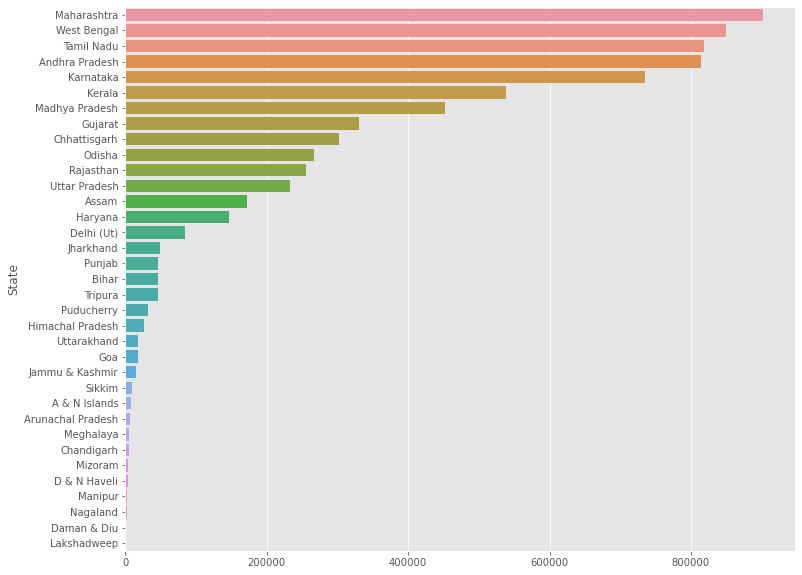

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize = (12,10))
sns.barplot(result.values,result.index)

after ploating the graph we can clearly say that sucide cases are very high in  maharashtra nd very low in Lakshadweep  

# now i am going to analyze does gender matters in sucide

<AxesSubplot:xlabel='Gender'>

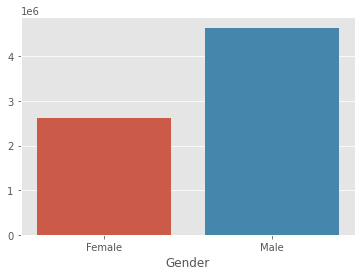

In [13]:
g_df=df.groupby(['Gender'])
result_df1=g_df['Total'].sum().sort_values()
result_df1
sns.barplot(result_df1.index,result_df1.values)

In [14]:
result_df1

Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64

by this graph we can say male do more sucide as compare to woman

In [15]:
year_df=df.groupby(['Year'])['Total'].sum().sort_values()
year_df

Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2012    647288
2010    672926
2011    677159
Name: Total, dtype: int64

<AxesSubplot:xlabel='Year'>

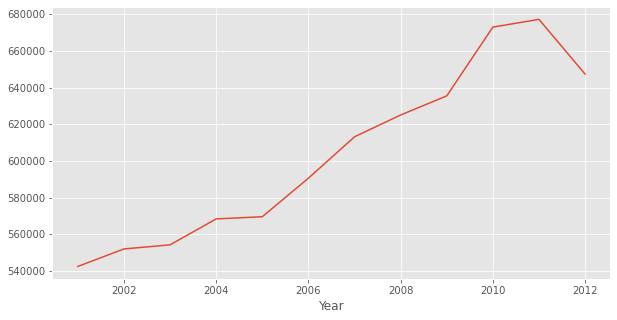

In [16]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(year_df.index,year_df.values)

by this graph we can clearly say that sucide cases has been increased in between 2001 to 2011 
in 2011 it was on its peack but after 2011 graph is decreasing

In [17]:
df
#now i am going to see which age group people is doing more sucide
df['Age_group'].unique()
df_age=df[df['Age_group']=='0-100+'].index
df.drop(df_age,inplace=True)


In [18]:
df_age1=df.groupby(['Age_group'])
result_age=df_age1['Total'].sum().sort_values(ascending=False)
result_age

Age_group
15-29    1534037
30-44    1471599
45-59     885177
60+       346925
0-14       98410
Name: Total, dtype: int64

In [19]:
df_new=df.groupby(['Age_group','Gender'])['Total'].sum().sort_values(ascending=False)
type(df_new)


pandas.core.series.Series

<AxesSubplot:xlabel='Age_group', ylabel='Total'>

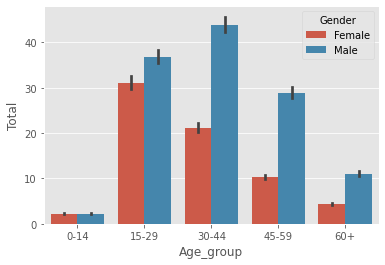

In [20]:
sns.barplot(x='Age_group',y='Total',hue='Gender',data=df)

<AxesSubplot:xlabel='Age_group'>

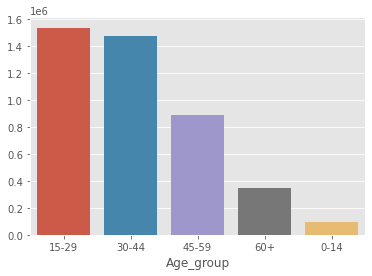

In [21]:
sns.barplot(result_age.index,result_age.values)

15 to 29 age_group people do more sucide as compare to other age_group people

In [22]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [23]:
new_df=df.groupby(['Type'])['Total'].sum().sort_values(ascending=False)
new_df

Type
Others (Please Specify)                           469147
By Hanging                                        460955
Family Problems                                   341952
House Wife                                        285243
By Consuming Insecticides                         275501
Causes Not known                                  237069
By Consuming Other Poison                         231178
Other Causes (Please Specity)                     216050
Farming/Agriculture Activity                      197923
Other Prolonged Illness                           194565
By Other means (please specify)                   135132
By Fire/Self Immolation                           128006
Service (Private)                                 115472
Unemployed                                        114374
By Drowning                                        96711
Insanity/Mental Illness                            94229
Self-employed (Business activity)                  78112
Student                   

In [24]:
new_df1=df.groupby(['Type','Gender','State'])['Total'].sum().sort_values(ascending=False).head(50)
new_df1

Type                           Gender  State         
By Hanging                     Male    Maharashtra       47260
Others (Please Specify)        Male    Andhra Pradesh    45165
                                       Tamil Nadu        43574
                                       Karnataka         42208
House Wife                     Female  Maharashtra       42059
By Hanging                     Male    Kerala            41143
Farming/Agriculture Activity   Male    Maharashtra       40785
By Consuming Insecticides      Male    Maharashtra       39813
Family Problems                Male    Maharashtra       39208
Others (Please Specify)        Male    Kerala            38507
By Consuming Insecticides      Male    Andhra Pradesh    37619
House Wife                     Female  West Bengal       36253
Others (Please Specify)        Male    West Bengal       34951
By Hanging                     Male    West Bengal       32784
                                       Karnataka         30077
F

# conclusion

1.Maharashtra is top in sucide cases nd Lakshdweep is least in sucide cases

2.boys do more sucide as compare to girls

3.15 to 29 age_groups people r doing more sucide

4.in age group 30 to 44 males are doing more sucide

5.after anylizing the data i found most common reason behind sucide is family problem

6.most of the people choose hanging for sucide
  